# SOLUTION NOTEBOOK

---

# Exercise - Ridge regression

## Exercise - Regularize polynomial regression

> **Exercise**: Load the data and add the polynomial features (degree 10). Split the data into train and test sets (80-20 train/test split with `random_state=0`). Fit a linear regression and a ridge regression (default alpha value of 1). Compare the MSE scores on the train/test sets. Plot the two models.

In [1]:
import pandas as pd
import os

# Load data
data_df = pd.read_csv(os.path.join('data', 'bike-sharing-simple.csv'))

# Create x/y data
x = data_df.temp.values
y = data_df.users.values

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import numpy as np

# Add polynomial features
pf_obj = PolynomialFeatures(degree=10, include_bias=False)
X_poly = pf_obj.fit_transform(x[:, np.newaxis])

# Split intro train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(
    X_poly, y, train_size=0.8, test_size=0.2, random_state=0)

print('Train set:', X_tr.shape, y_tr.shape)
print('Test set:', X_te.shape, y_te.shape)

Train set: (241, 10) (241,)
Test set: (61, 10) (61,)


Linear regression - MSE train: 39,804 test: 54,309
Ridge regression - MSE train: 48,039 test: 55,830


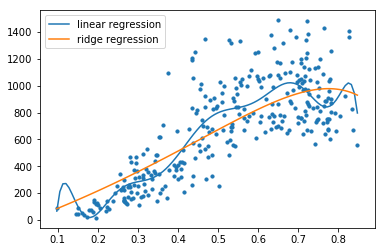

In [3]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error as mse

# Fit a linear regression
lr = LinearRegression()
lr.fit(X_tr, y_tr)
print('Linear regression - MSE train: {:,.0f} test: {:,.0f}'.format(
    mse(y_tr, lr.predict(X_tr)),
    mse(y_te, lr.predict(X_te))
))

# Fit a ridge regression
ridge = Ridge()
ridge.fit(X_tr, y_tr)
print('Ridge regression - MSE train: {:,.0f} test: {:,.0f}'.format(
    mse(y_tr, ridge.predict(X_tr)),
    mse(y_te, ridge.predict(X_te))
))

# Plot models
x_values = np.linspace(min(x), max(x), num=100)
x_values_poly = pf_obj.transform(x_values[:, np.newaxis])
y_values_lr = lr.predict(x_values_poly)
y_values_ridge = ridge.predict(x_values_poly)

%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x, y, s=10)
plt.plot(x_values, y_values_lr, label='linear regression')
plt.plot(x_values, y_values_ridge, label='ridge regression')
plt.legend()
plt.show()

## Exercise - Tune Ridge regression

> **Exercise**: Tune the regularization strength $\alpha$ of your ridge regression using grid search. Plot the validation curves. Print the train/test scores of the best alpha value. Plot your model.

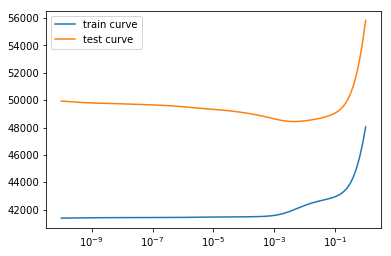

In [4]:
# Define a set of alpha values
alphas = np.logspace(-10, 0, num=100)

# Save train/test scores
train_scores = []
test_scores = []

# Grid search
for alpha in alphas:
    # Ridge regression
    ridge = Ridge(alpha)
    ridge.fit(X_tr, y_tr)
    
    # Train score
    y_pred = ridge.predict(X_tr)
    train_scores.append(mse(y_tr, y_pred))
    
    # Test score
    y_pred = ridge.predict(X_te)
    test_scores.append(mse(y_te, y_pred))
    
# Plot validation curves
plt.semilogx(alphas, train_scores, label='train curve')
plt.semilogx(alphas, test_scores, label='test curve')
plt.legend()
plt.show()

In [5]:
# Find best alpha
idx = np.argmin(test_scores)
best_alpha = alphas[idx]
print('Best alpha {:.1e}'.format(best_alpha))

# Print train/test scores
print('Ridge regression 2 - MSE train: {:,.0f} test: {:,.0f}'.format(
    train_scores[idx],
    test_scores[idx]
))

Best alpha 4.8e-03
Ridge regression 2 - MSE train: 42,018 test: 48,437


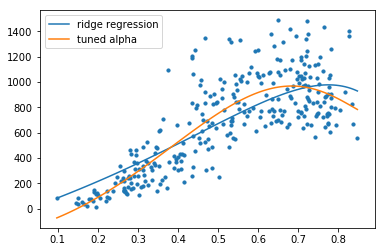

In [6]:
# Ridge regression with tuned alpha
ridge2 = Ridge(best_alpha)
ridge2.fit(X_tr, y_tr)

# Plot model
y_values_ridge2 = ridge2.predict(x_values_poly)

plt.scatter(x, y, s=10)
plt.plot(x_values, y_values_ridge, label='ridge regression')
plt.plot(x_values, y_values_ridge2, label='tuned alpha')
plt.legend()
plt.show()